In [1]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os


/home/aa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_DIR='Data Mining/mini-project-sentiment'

In [7]:
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join(DATA_DIR, "afterprep637ts.csv"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()


In [8]:
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40

In [10]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}


In [11]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0
ftrain = open(os.path.join(DATA_DIR, "afterprep637ts.csv"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


In [26]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [27]:
y_binary

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [29]:
ytrain

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [30]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 150

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE,
input_length=MAX_SENTENCE_LENGTH))
model.add(Dropout(0.2))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
# model.add(Activation("softmax",input_shape=(2)))

model.compile(loss="categorical_crossentropy", optimizer="adam",
    metrics=["accuracy"])


In [31]:
history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
    validation_data=(Xtest, ytest))


Train on 2196 samples, validate on 550 samples
Epoch 1/150
2196/2196 [==============================] - 5s 2ms/step - loss: 1.0596 - acc: 0.4622 - val_loss: 1.0125 - val_acc: 0.5055
Epoch 2/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.9646 - acc: 0.5401 - val_loss: 0.9470 - val_acc: 0.5582
Epoch 3/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.9179 - acc: 0.5656 - val_loss: 0.9214 - val_acc: 0.5727
Epoch 4/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.9109 - acc: 0.5742 - val_loss: 0.9191 - val_acc: 0.5655
Epoch 5/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.8914 - acc: 0.5870 - val_loss: 0.9148 - val_acc: 0.5618
Epoch 6/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.8838 - acc: 0.5797 - val_loss: 0.9084 - val_acc: 0.5691
Epoch 7/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.8746 - acc: 0.5970 - val_loss: 0.9219 - val_acc: 0.5727
Epoch 8/

Epoch 61/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7327 - acc: 0.6553 - val_loss: 1.0897 - val_acc: 0.5491
Epoch 62/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7302 - acc: 0.6680 - val_loss: 1.0721 - val_acc: 0.5473
Epoch 63/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7299 - acc: 0.6612 - val_loss: 1.0772 - val_acc: 0.5309
Epoch 64/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7244 - acc: 0.6594 - val_loss: 1.1035 - val_acc: 0.5382
Epoch 65/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7242 - acc: 0.6594 - val_loss: 1.0967 - val_acc: 0.5436
Epoch 66/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7214 - acc: 0.6553 - val_loss: 1.1042 - val_acc: 0.5509
Epoch 67/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.7209 - acc: 0.6571 - val_loss: 1.1151 - val_acc: 0.5473
Epoch 68/150
2196/2196 [========================

2196/2196 [==============================] - 3s 2ms/step - loss: 0.6001 - acc: 0.7149 - val_loss: 1.3234 - val_acc: 0.5164
Epoch 122/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.5875 - acc: 0.7254 - val_loss: 1.3289 - val_acc: 0.5127
Epoch 123/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.5897 - acc: 0.7236 - val_loss: 1.3350 - val_acc: 0.5127
Epoch 124/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.5941 - acc: 0.7209 - val_loss: 1.3435 - val_acc: 0.5000
Epoch 125/150
2196/2196 [==============================] - 4s 2ms/step - loss: 0.5849 - acc: 0.7254 - val_loss: 1.3489 - val_acc: 0.4982
Epoch 126/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.5826 - acc: 0.7277 - val_loss: 1.3670 - val_acc: 0.5145
Epoch 127/150
2196/2196 [==============================] - 3s 2ms/step - loss: 0.5768 - acc: 0.7391 - val_loss: 1.4013 - val_acc: 0.5127
Epoch 128/150
2196/2196 [==============================

### on raw data not after prep

In [48]:
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join(DATA_DIR, "rawt.csv"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()


In [49]:
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40

In [50]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}


In [51]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0
ftrain = open(os.path.join(DATA_DIR, "rawt.csv"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


In [52]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [53]:
y_binary

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [55]:
ytrain

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [77]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 20

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE,
input_length=MAX_SENTENCE_LENGTH))
model.add(Dropout(0.2))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
# model.add(SpatialDropout1D(0.2))
model.add(Dense(35,activation='relu'))
model.add(Dropout(0.6))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
# model.add(Activation("softmax",input_shape=(2)))

model.compile(loss="categorical_crossentropy", optimizer="adam",
    metrics=["mae",'acc'])


In [78]:
history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
    validation_data=(Xtest, ytest))


Train on 2196 samples, validate on 550 samples
Epoch 1/20
2196/2196 [==============================] - 7s 3ms/step - loss: 1.0843 - mean_absolute_error: 0.4386 - acc: 0.3916 - val_loss: 1.0822 - val_mean_absolute_error: 0.4382 - val_acc: 0.4073
Epoch 2/20
2196/2196 [==============================] - 4s 2ms/step - loss: 1.0645 - mean_absolute_error: 0.4312 - acc: 0.4230 - val_loss: 1.0694 - val_mean_absolute_error: 0.4342 - val_acc: 0.3927
Epoch 3/20
2196/2196 [==============================] - 4s 2ms/step - loss: 1.0517 - mean_absolute_error: 0.4269 - acc: 0.4572 - val_loss: 1.0511 - val_mean_absolute_error: 0.4268 - val_acc: 0.4600
Epoch 4/20
2196/2196 [==============================] - 4s 2ms/step - loss: 1.0098 - mean_absolute_error: 0.4122 - acc: 0.5055 - val_loss: 1.0308 - val_mean_absolute_error: 0.4200 - val_acc: 0.4564
Epoch 5/20
2196/2196 [==============================] - 4s 2ms/step - loss: 0.9207 - mean_absolute_error: 0.3792 - acc: 0.5729 - val_loss: 1.0381 - val_mean_abso

# worse than the afterprep accuracy
### Overfitting 

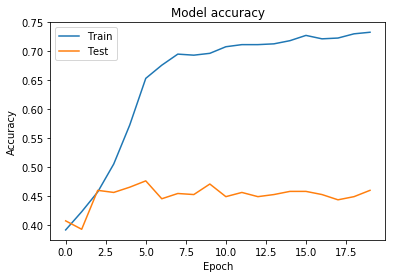

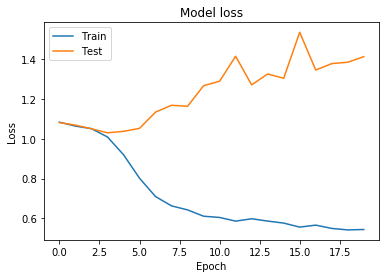

In [79]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# higher accuracy with preprocessing 

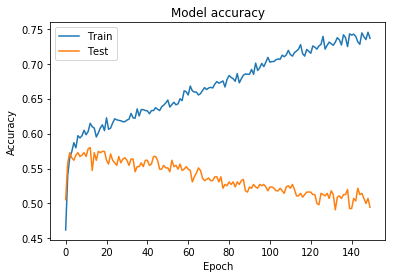

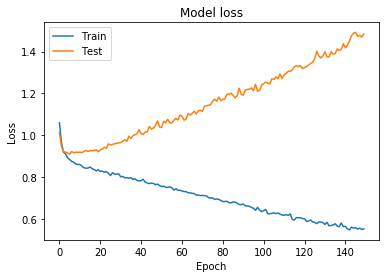

In [63]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()